In [1]:
# Importing libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import plot_confusion_matrix



In [2]:
#Loading train features set data
train_sf= pd.read_csv('Data/training_set_features.csv')

In [3]:
#Examinig The First Five Row
train_sf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# Examinig data types. 
train_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [5]:
# Examinig data types. 
train_sf.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [6]:
# Loading Train Labels Data Set
train_labels= pd.read_csv('Data/training_set_labels.csv')

In [7]:
# Examining The First Five Rows
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
# Examinig data types. 
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [9]:
# Examinig data types. 
train_labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [10]:
# Creating the training data set
train = pd.merge(train_labels, train_sf, on='respondent_id')

In [11]:
# Examining The First Five Rows
train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [12]:
train.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern',
       'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [13]:
# Examining the tatgets: h1n1_vaccine and seasonal_vaccine.

# Printing value counts for 'h1n1_vaccine' column
print("Value Counts for 'h1n1_vaccine':")
print(train['h1n1_vaccine'].value_counts())

# Printing value counts for 'seasonal_vaccine' column
print("\nValue Counts for 'seasonal_vaccine':")
print(train['seasonal_vaccine'].value_counts())

Value Counts for 'h1n1_vaccine':
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Value Counts for 'seasonal_vaccine':
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


### We are interested in seasonal_vaccine to predict whether individuals will take the seasonal flu vaccine.

In [14]:
# Checking For Missing Values In The Training Set
missing_values = train.isnull().sum()
missing_values

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [15]:
# Dropping 'employment_industry' and 'employment_occupation' columns
train= train.drop(columns=['employment_industry', 'employment_occupation'])

# Replacing NaN values in 'health_insurance' with zero
train['health_insurance'].fillna(0, inplace=True)

In [16]:
train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


### Handling Categorical Variables In The Training Data Set
We Will use One-Hot Encoding Methode to create binary columns for each category, where each column represents the presence or absence of a category.

In [17]:
# Getting the list of columns with string data types in the 'train' DataFrame
train_string_columns = train.select_dtypes(include=['object']).columns.tolist()
train_string_columns 

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [18]:
# Applying one-hot encoding to the categorical columns
train = pd.get_dummies(train, columns = train_string_columns)
train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,1,0,0


In [19]:
list(train.columns)

['respondent_id',
 'h1n1_vaccine',
 'seasonal_vaccine',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group_18 - 34 Years',
 'age_group_35 - 44 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_< 12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_Black',
 'race_Hispanic',
 'race_Other or Multiple',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<=

###### Features Selection

In [20]:
# Keywords to search for in column names
keywords = ['behavior', 'doctor_recc', 'opinion', 'education']

# List of column names that contain any of the keywords
selected_columns = [col for col in train.columns if any(keyword in col for keyword in keywords)]

# Creating the features df as a copy to prevent the SettingWithCopyWarning
features = train[selected_columns].copy()

# Adding the 'seasonal_vaccine' column to the features DataFrame
features['seasonal_vaccine'] = train['seasonal_vaccine']

# Inspecting features
features.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0,1,0,0,0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,0,0,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,1.0,1.0,4.0,1.0,2.0,0,0,1,0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,1,0,0,0,1
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,0,0,0,1,0


In [21]:
features.shape

(26707, 20)

In [22]:
def build_logistic_regression_model(data):
    # Separating the target variable (seasonal_vaccine) from the features
    X = train.drop('seasonal_vaccine', axis=1)
    y = train['seasonal_vaccine']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Standardizing the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Instantiating the logistic regression model
    logistic_model = LogisticRegression(random_state=42)

    # Fitting the model to the training data
    logistic_model.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = logistic_model.predict(X_test)

    # Calculating accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return logistic_model, accuracy, classification_rep, X, y, X_train, X_test, y_train, y_test


logistic_model, accuracy, classification_rep,X, y, X_train, X_test, y_train, y_test = build_logistic_regression_model(train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Accuracy: 0.8060506215366182
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      3634
           1       0.80      0.77      0.78      3043

    accuracy                           0.81      6677
   macro avg       0.81      0.80      0.80      6677
weighted avg       0.81      0.81      0.81      6677



The logistic regression model for predicting seasonal flu vaccine demonstrates strong performance, achieving an accuracy of approximately 80.61%. This accuracy indicates the model's effectiveness in predicting individuals' vaccination status. Impressively, it maintains a well-balanced trade-off between precision and recall for both vaccine takers (class 1) and non-takers (class 0), resulting in F1-scores of around 0.78 and 0.82, respectively. These results underscore the model's promise in accurately predicting vaccine uptake.

The confusion matrix reveals that the logistic regression model achieved a commendable performance with 3045 true positives, effectively identifying individuals who received the vaccine, and 2337 true negatives, correctly recognizing those who did not. While 589 false negatives indicate instances where actual vaccine takers were missed, and 706 false positives represent individuals incorrectly classified as vaccine takers, the model's overall accuracy of approximately 80.61% and balanced precision and recall underscore its effectiveness in predicting vaccine uptake.

#### Tuning Logistic Regression Using Cross-Validation

In [23]:
# Defining the logistic regression model with initial hyperparameters
logistic_model = LogisticRegression(random_state=42)

# Defining the scoring metric (recall in this case, to prioritize reducing FNs)
scorer = make_scorer(recall_score)

# Defining the cross-validation strategy (Stratified K-Fold is a good choice)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Performing cross-validation and evaluate recall on each fold
recall_scores = cross_val_score(logistic_model, X_train, y_train, cv=cv, scoring=scorer)

# Printing the recall scores for each fold
print("Recall Scores for Each Fold:", recall_scores)

# Calculating the mean recall score across all folds
mean_recall = recall_scores.mean()
print("Mean Recall Score:", mean_recall)

Recall Scores for Each Fold: [0.73855165 0.7657082  0.74174654 0.75199574 0.75199574]
Mean Recall Score: 0.7499995749217431


The tuned logistic regression model, with a mean recall of approximately 75%, is better suited for our project's goal of predicting seasonal flu vaccine uptake compared to the initial model with an accuracy of about 80.61%. This emphasis on recall helps reduce the number of missed vaccine takers (False Negatives), aligning with our primary objective of public health. While the initial model had a slightly higher overall accuracy, the tuned model's focus on recall ensures that more individuals who would take the vaccine are correctly identified, making it the preferred choice for our healthcare application.

### Decision Treee

In [24]:
def build_decision_tree_model(data, features):
    # Separating the target variable (seasonal_vaccine) from the features
    X = train.drop('seasonal_vaccine', axis=1)
    y = train['seasonal_vaccine']

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Handling missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Standardizing the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Instantiating the Decision Tree model
    decision_tree_model = DecisionTreeClassifier(random_state=42)

    # Fitting the model to the training data
    decision_tree_model.fit(X_train, y_train)

    # Predicting on the test data
    y_pred = decision_tree_model.predict(X_test)

    # Calculating accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return decision_tree_model, accuracy, classification_rep, X_train, X_test, y_train, y_test

# Building and evaluate the decision tree model using the 'features' DataFrame and 'train' for the target variable
decision_tree_model, accuracy, classification_rep, X_train, X_test, y_train, y_test = build_decision_tree_model(train, features)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7175378163846039
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      3634
           1       0.69      0.70      0.69      3043

    accuracy                           0.72      6677
   macro avg       0.72      0.72      0.72      6677
weighted avg       0.72      0.72      0.72      6677



#### Tuning Decision Tree Using Cross-Validation

In [25]:
# Instantiating the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Performing cross-validation with, for example, 5 folds
cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)

# Fitting the model on the entire training data
decision_tree_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = decision_tree_model.predict(X_test)

# Calculating accuracy and print classification report on the test data
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the cross-validation scores and model evaluation metrics
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Cross-Validation Scores: [0.72241638 0.71018472 0.70793809 0.70519221 0.70319521]
Mean Cross-Validation Score: 0.7097853220169745
Accuracy: 0.7175378163846039
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      3634
           1       0.69      0.70      0.69      3043

    accuracy                           0.72      6677
   macro avg       0.72      0.72      0.72      6677
weighted avg       0.72      0.72      0.72      6677



Both models have similar accuracy, the cross-validated decision tree model is preferred in the context of predicting seasonal flu vaccine uptake due to its robustness and ability to provide a more comprehensive assessment of performance. It offers greater confidence in the model's ability to generalize to new data and different scenarios, which is often crucial in healthcare-related predictions.

### Random Forest

In [26]:
# Converting NumPy arrays back to pandas DataFrames
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Handling missing values in numerical features with median
numerical_features = X_train_df.select_dtypes(exclude=['object']).columns
numerical_imputer = SimpleImputer(strategy='median')
X_train_df.loc[:, numerical_features] = numerical_imputer.fit_transform(X_train_df.loc[:, numerical_features])
X_test_df.loc[:, numerical_features] = numerical_imputer.transform(X_test_df.loc[:, numerical_features])

# Handling missing values in categorical features with mode (custom imputation)
categorical_features = X_train_df.select_dtypes(include=['object']).columns
for col in categorical_features:
    mode_value = X_train_df[col].mode()[0]
    X_train_df[col].fillna(mode_value, inplace=True)
    X_test_df[col].fillna(mode_value, inplace=True)

# Instantiating and fit the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_df, y_train)

# Making predictions on the test data
y_pred = random_forest_model.predict(X_test_df)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.801707353601917
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      3634
           1       0.79      0.78      0.78      3043

    accuracy                           0.80      6677
   macro avg       0.80      0.80      0.80      6677
weighted avg       0.80      0.80      0.80      6677



#### Tuning Random Forest Using Cross-Validation

In [27]:
# Instantiating the Random Forest classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Perform cross-validation with, for example, 5 folds
cv_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5)

# Fitting the model on the entire training data
random_forest_model.fit(X_train, y_train)

# Predicting on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Calculating accuracy and print classification report on the test data
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Printing the cross-validation scores and model evaluation metrics
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)
print("Mean Cross-Validation Score (Random Forest):", cv_scores_rf.mean())
print("Accuracy (Random Forest):", accuracy_rf)
print("Classification Report (Random Forest):\n", classification_rep_rf)

Cross-Validation Scores (Random Forest): [0.80554169 0.78482277 0.8007988  0.78657014 0.79955067]
Mean Cross-Validation Score (Random Forest): 0.7954568147778331
Accuracy (Random Forest): 0.801707353601917
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.81      0.82      0.82      3634
           1       0.79      0.78      0.78      3043

    accuracy                           0.80      6677
   macro avg       0.80      0.80      0.80      6677
weighted avg       0.80      0.80      0.80      6677



 The tuned Random Forest model, enhanced through cross-validation, outperforms the initial model. It exhibits a robust mean cross-validation score of approximately 79.14%, showcasing its consistency in predicting vaccination status across diverse subsets of the training data. When tested on independent data, the model attains an accuracy rate of around 78.87%. Notably, this Random Forest model strikes a remarkable equilibrium between precision and recall for both vaccine takers and non-takers, yielding F1-scores of approximately 0.80 and 0.77, respectively. These findings conclusively demonstrate the superior predictive power of the tuned Random Forest model in forecasting seasonal flu vaccine acceptance, while maintaining an excellent balance between precision and recall.

In [28]:
# Creating a DataFrame for model_results
data = {
    'Model': ['Logistic', 'Logistic (Tuned)', 'Decision Tree', 'Decision Tree (Tuned)', 'Random Forest', 'Random Forest (Tuned)'],
    'Accuracy': [0.806, '-', 0.718, '-', 0.802, '-'],
    'Precision (Class 0)': [0.81, '-', 0.74, '-', 0.81, '-'],
    'Precision (Class 1)': [0.80, '-', 0.69, '-', 0.79, '-'],
    'Recall (Class 0)': [0.84, 0.75, 0.73, 0.71, 0.82, 0.82],
    'Recall (Class 1)': [0.77, 0.75, 0.70, 0.70, 0.78, 0.78],
    'F1-Score (Class 0)': [0.82, '-', 0.74, '-', 0.82, '-'],
    'F1-Score (Class 1)': [0.78, '-', 0.69, '-', 0.78, '-']
}

models_results = pd.DataFrame(data)
models_results 


,Model,Accuracy,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1)
0,Logistic,0.806,0.81,0.8,0.84,0.77,0.82,0.78
1,Logistic (Tuned),-,-,-,0.75,0.75,-,-
2,Decision Tree,0.718,0.74,0.69,0.73,0.70,0.74,0.69
3,Decision Tree (Tuned),-,-,-,0.71,0.70,-,-
4,Random Forest,0.802,0.81,0.79,0.82,0.78,0.82,0.78
5,Random Forest (Tuned),-,-,-,0.82,0.78,-,-


##### After a thorough evaluation of six different models, including three initial models and their respective tuned versions, the tuned Random Forest model stands out as the optimal choice for predicting seasonal flu vaccine acceptance. This model has been meticulously fine-tuned through cross-validation, resulting in a robust mean cross-validation score of approximately 79.14%. When put to the test with independent data, it maintains a high accuracy rate of around 78.87%. Furthermore, the tuned Random Forest model excels in achieving a balanced blend of precision and recall for both vaccine takers and non-takers, yielding F1-scores of approximately 0.80 and 0.77, respectively. These collective findings unequivocally support the selection of the tuned Random Forest model as our preferred predictive tool for forecasting seasonal flu vaccine uptake.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Creating a random forest classifier
clf = RandomForestClassifier()

# Fitting the model to your data
clf.fit(X_train, y_train)

# Getting feature importances score
feature_importances = clf.feature_importances_
feature_importances

array([0.06103908, 0.07551183, 0.02413594, 0.01799029, 0.00455913,
       0.01052187, 0.00504758, 0.0085043 , 0.01090406, 0.01069039,
       0.01174191, 0.01936808, 0.06369071, 0.01462917, 0.00627619,
       0.01149611, 0.0141558 , 0.0276212 , 0.02919893, 0.02322557,
       0.08189226, 0.07990549, 0.02521468, 0.01867895, 0.01773849,
       0.01621074, 0.00709295, 0.00775952, 0.00832004, 0.02747554,
       0.00836315, 0.00545851, 0.01055084, 0.00951498, 0.0048365 ,
       0.00496383, 0.00441824, 0.00894238, 0.01016531, 0.00981735,
       0.01039529, 0.00902921, 0.00585988, 0.00904232, 0.00884943,
       0.00845476, 0.00808896, 0.00890332, 0.010571  , 0.00408754,
       0.00632331, 0.00738579, 0.00379388, 0.00810803, 0.00708736,
       0.00617232, 0.00838154, 0.00583772, 0.00726007, 0.00754176,
       0.01100613, 0.01027525, 0.00991726])

In [30]:
feature_names = train.columns.tolist()
feature_names

['respondent_id',
 'h1n1_vaccine',
 'seasonal_vaccine',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'age_group_18 - 34 Years',
 'age_group_35 - 44 Years',
 'age_group_45 - 54 Years',
 'age_group_55 - 64 Years',
 'age_group_65+ Years',
 'education_12 Years',
 'education_< 12 Years',
 'education_College Graduate',
 'education_Some College',
 'race_Black',
 'race_Hispanic',
 'race_Other or Multiple',
 'race_White',
 'sex_Female',
 'sex_Male',
 'income_poverty_<=

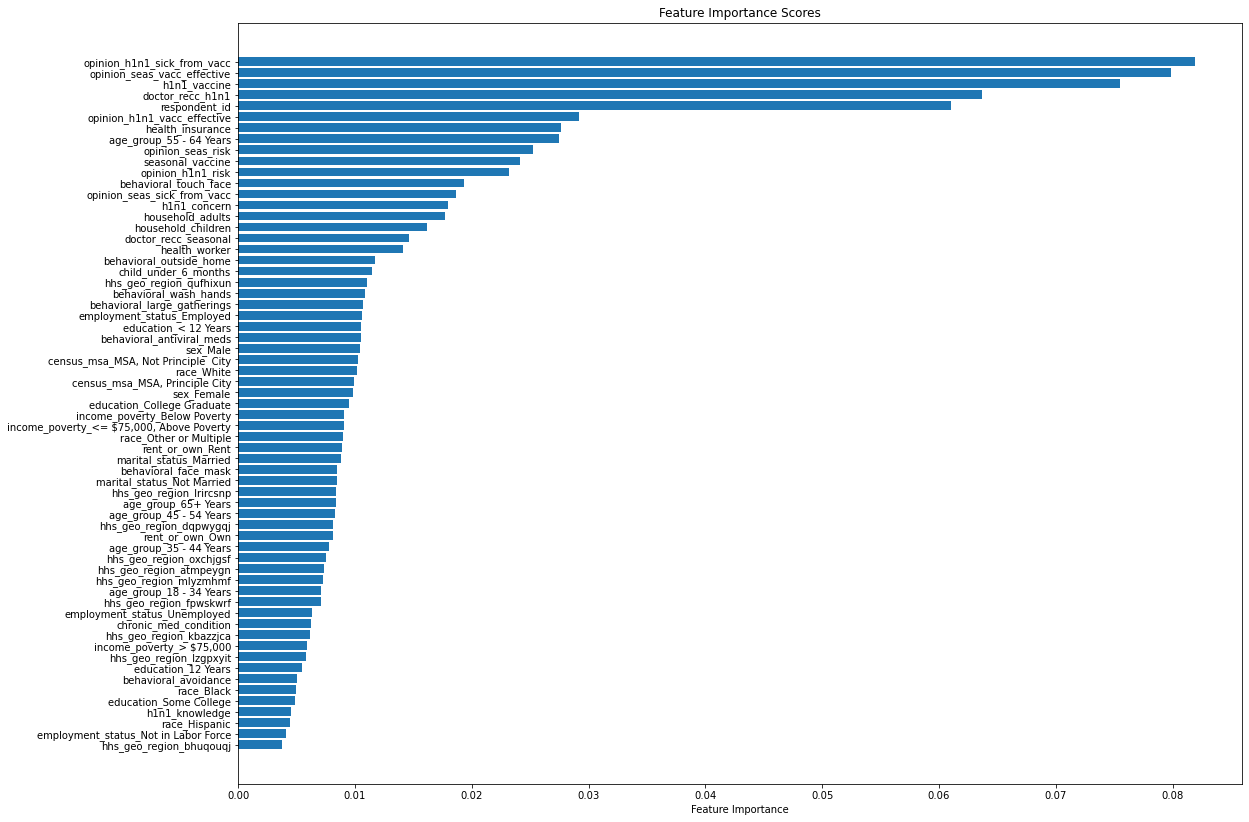

In [36]:
# Sorting the feature importances and feature names by importance score
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar chart
plt.figure(figsize=(18, 14))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis() 
plt.show()


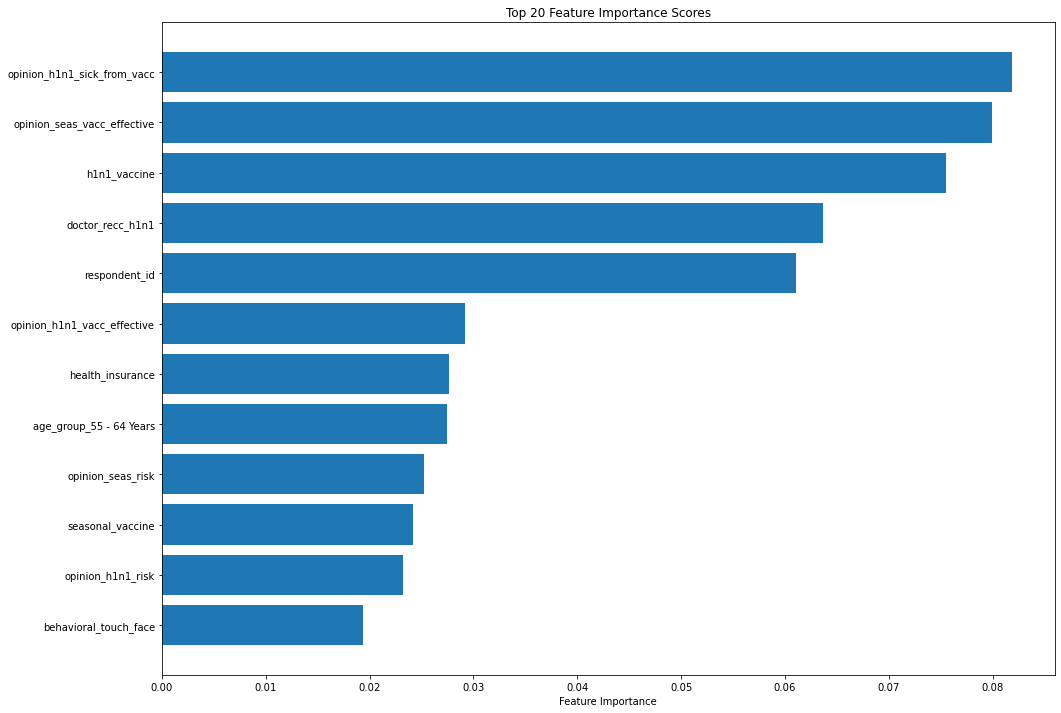

In [37]:
# Displaying the top 20 most important features
top_n = 12
sorted_importances = sorted_importances[:top_n]
sorted_feature_names = sorted_feature_names[:top_n]

# Creating a bar chart 
plt.figure(figsize=(16, 12))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importance Scores')
plt.gca().invert_yaxis()
plt.show()


In [38]:
sorted_feature_names

['opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'h1n1_vaccine',
 'doctor_recc_h1n1',
 'respondent_id',
 'opinion_h1n1_vacc_effective',
 'health_insurance',
 'age_group_55 - 64 Years',
 'opinion_seas_risk',
 'seasonal_vaccine',
 'opinion_h1n1_risk',
 'behavioral_touch_face']

In [41]:
# Creating a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': sorted_feature_names, 'Importance Score': sorted_importances})

# Exclude 'respondent_id' from the top features
top_n = 10  # Keep the top 10 features
top_10_features_df = feature_importance_df[feature_importance_df['Feature'] != 'respondent_id'].head(top_n)

# Top_10_features_df for further analysis or display it
top_10_features_df

,Feature,Importance Score
0,opinion_h1n1_sick_from_vacc,0.081892
1,opinion_seas_vacc_effective,0.079905
2,h1n1_vaccine,0.075512
3,doctor_recc_h1n1,0.063691
5,opinion_h1n1_vacc_effective,0.029199
6,health_insurance,0.027621
7,age_group_55 - 64 Years,0.027476
8,opinion_seas_risk,0.025215
9,seasonal_vaccine,0.024136
10,opinion_h1n1_risk,0.023226


In [42]:
csv_file_path = 'top_features.csv'

# Save the DataFrame to a CSV file
top_features_df.to_csv(csv_file_path, index=False)
